# Clustering of selected features

This notebook contains the results and visualizations from clustering the matrix of selected features

Mount google drive containing the data

In [1]:
MOUNT_POINT = '/content/drive'

Set *notebook_dir* to contain path to the directory containing log_parser.ipynb and clustering_utilities.ipynb


In [2]:
notebook_dir = '/content/drive/MyDrive/Notebooks'

Set *path* to contain path to the directory containing dataset


In [3]:
path = '/content/drive/MyDrive/Notebooks/data'

In [4]:
from google.colab import drive 
drive.mount(MOUNT_POINT, force_remount=True)

Mounted at /content/drive


Importing notebooks containing methods for parsing and processing log files

In [5]:
!pip install import_ipynb
import import_ipynb
%cd $notebook_dir
import clustering_utilities as cu
import log_parser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/Notebooks
importing Jupyter notebook from clustering_utilities.ipynb
importing Jupyter notebook from log_parser.ipynb
Mounted at /content/drive


# Data preprocessing and clustering

First, we parse files and get a list of training objects 

In [6]:
training_list = log_parser.process_files(path)
print(log_parser.ip_list)

['10.103.130.145', '10.103.130.164', '10.103.130.115', '10.103.130.185', '10.103.130.105', '10.103.130.166', '10.103.130.147', '10.103.130.156', '10.103.130.142', '10.103.130.123', '10.103.130.159', '10.103.130.136', '10.103.130.118', '10.103.130.151', '10.103.130.103', '10.103.130.172', '10.103.130.154', '10.103.130.122', '10.103.130.140', '10.103.130.108', '10.103.130.201', '10.103.130.162', '10.103.130.192', '10.103.130.125', '10.103.130.144', '10.103.130.157', '10.103.130.207', '10.103.130.165', '10.103.130.114', '10.103.130.132', '10.103.130.195', '10.103.130.188', '10.103.130.67', '10.103.130.171', '10.103.130.128', '10.103.130.190', '10.103.130.160', '10.103.130.127', '10.103.130.174']


We transform a list of Training objects to list of dictionaries suitable for clustering and load the feature values

In [7]:
prepared_list = cu.prepare_tlist_for_vectorizer(training_list)
cu.add_training_features(prepared_list, training_list)
for line in prepared_list:
  print(line)

{'total_time': 24, 'total_cmd': 3, 'average_diff': 12.0, 'delay_count': 0, 'percent_cmd': 0.0}
{'total_time': 4269, 'total_cmd': 19, 'average_diff': 237.16666666666666, 'delay_count': 1, 'percent_cmd': 0.0}
{'total_time': 12590, 'total_cmd': 109, 'average_diff': 116.57407407407408, 'delay_count': 3, 'percent_cmd': 1.0}
{'total_time': 1963, 'total_cmd': 12, 'average_diff': 178.45454545454547, 'delay_count': 1, 'percent_cmd': 0.0}
{'total_time': 22393, 'total_cmd': 283, 'average_diff': 79.40780141843972, 'delay_count': 7, 'percent_cmd': 0.6666666666666666}
{'total_time': 25650, 'total_cmd': 217, 'average_diff': 118.75, 'delay_count': 7, 'percent_cmd': 1.0}
{'total_time': 5800, 'total_cmd': 8, 'average_diff': 828.5714285714286, 'delay_count': 1, 'percent_cmd': 0.6666666666666666}
{'total_time': 6308, 'total_cmd': 84, 'average_diff': 76.0, 'delay_count': 2, 'percent_cmd': 0.6666666666666666}
{'total_time': 385, 'total_cmd': 10, 'average_diff': 42.77777777777778, 'delay_count': 0, 'percent_

We create the feature matrix and scale each feature by its maximum absolute value

In [8]:
matrix = cu.get_feature_matrix(prepared_list)
matrix = cu.max_abs_scaling(matrix)
print(matrix)

[[1.44827586e-02 0.00000000e+00 0.00000000e+00 2.52312868e-03
  4.20986160e-04]
 [2.86235632e-01 7.69230769e-02 0.00000000e+00 1.59798150e-02
  7.48829132e-02]
 [1.40692848e-01 2.30769231e-01 1.00000000e+00 9.16736754e-02
  2.20842323e-01]
 [2.15376176e-01 7.69230769e-02 0.00000000e+00 1.00925147e-02
  3.44331597e-02]
 [9.58370017e-02 5.38461538e-01 6.66666667e-01 2.38015139e-01
  3.92797628e-01]
 [1.43318966e-01 5.38461538e-01 1.00000000e+00 1.82506308e-01
  4.49928959e-01]
 [1.00000000e+00 7.69230769e-02 6.66666667e-01 6.72834315e-03
  1.01738322e-01]
 [9.17241379e-02 1.53846154e-01 6.66666667e-01 7.06476030e-02
  1.10649196e-01]
 [5.16283525e-02 0.00000000e+00 1.00000000e+00 8.41042893e-03
  6.75331965e-03]
 [2.68658479e-02 0.00000000e+00 6.66666667e-01 6.22371741e-02
  2.85042713e-02]
 [1.25416667e-01 0.00000000e+00 0.00000000e+00 3.11185870e-02
  6.56212177e-02]
 [1.35982305e-01 7.69230769e-02 1.00000000e+00 6.47603028e-02
  1.50204354e-01]
 [5.27919911e-02 0.00000000e+00 6.666666

We set the minimal number of samples in a cluster to 4 and as similarity measure we chose Cosine similarity

In [9]:
MIN_SAMPLES = 4
SIMILARITY_MEASURE = 'minkowski'

Finally, we apply of clustering algorithm on scaled feature matrix

In [10]:
clustering_results = cu.cluster(matrix, MIN_SAMPLES, SIMILARITY_MEASURE)
print(clustering_results.labels_)
print(clustering_results.core_distances_)
DP_cluster = zip(log_parser.ip_list, clustering_results.labels_)
dictClusterDPs = {}
for dp, cluster in DP_cluster:
  print(dp, " ", cluster)
  try:
    dictClusterDPs[cluster].append(dp)
  except:
    dictClusterDPs[cluster] = [dp]

[ 0  0  2  0  1  3 -1  1  2  1  0  2  1  1  0 -1  1 -1 -1  3  1  3  3  3
  3 -1  1  0  1  1  3  3 -1  2  1  1  1  2  1]
[0.13181465 0.24213621 0.20563587 0.1694102  0.34628337 0.15350054
 0.80645092 0.12216687 0.19179744 0.06701354 0.12419607 0.17147851
 0.04783142 0.06711891 0.0856354  1.10537134 0.06717427 0.33477431
 0.33698258 0.19788068 0.31108545 0.22067634 0.16329799 0.12481815
 0.17928017 0.42333372 0.245594   0.106001   0.38256561 0.11189345
 0.18956901 0.17928017 0.33352073 0.13967293 0.07181396 0.11189345
 0.12354323 0.1694949  0.17892893]
10.103.130.145   0
10.103.130.164   0
10.103.130.115   2
10.103.130.185   0
10.103.130.105   1
10.103.130.166   3
10.103.130.147   -1
10.103.130.156   1
10.103.130.142   2
10.103.130.123   1
10.103.130.159   0
10.103.130.136   2
10.103.130.118   1
10.103.130.151   1
10.103.130.103   0
10.103.130.172   -1
10.103.130.154   1
10.103.130.122   -1
10.103.130.140   -1
10.103.130.108   3
10.103.130.201   1
10.103.130.162   3
10.103.130.192   3
10

0: 145, 164, 185, 159, 103, 165

-1: 147 (0.33 fast), 172 (1 much), 122 (0.33), 140 (0.33), 157 (1 long), 167 (0.33) 

0.66: 105, 156, 123, 118, 151, 154, 201, 207, 114, 132, 128, 190, 160, 174

1: 115, 142 ?, 136, 171, 127

1: 166, 108, 162, 192, 125, 144, 195, 188

## Get cluster data

Training lists containing cluster data are used later for visualization

We create list of Training objects, for each cluster

In [11]:
cluster_names = []
for labels in list(set(clustering_results.labels_))[:-1]:
  cluster_names.append(f'cluster{labels}')
print(cluster_names)
training_data = cu.extract_training_data(clustering_results, training_list, cluster_names)

['cluster0', 'cluster1', 'cluster2', 'cluster3']


List containing attribute values for each training in a cluster is also needed

In [12]:
attribute_names = ['total_cmd', 'total_time', 'average_diff',
                   'delay_count', 'percent_cmd']
attribute_data = []
for name in attribute_names:
  attribute_data.append(cu.get_attribute_values(training_data, name))
for item in attribute_data:
  print(item)

[[3, 19, 12, 37, 9, 18], [283, 84, 74, 32, 53, 15, 121, 22, 62, 142, 65, 92, 142, 275], [109, 10, 77, 86, 59], [217, 108, 160, 274, 234, 217, 136, 241]]
[[24, 4269, 1963, 3741, 443, 523], [22393, 6308, 1625, 1356, 478, 810, 14087, 5006, 19651, 6581, 4101, 8688, 12625, 12627], [12590, 385, 8563, 5689, 1947], [25650, 22288, 29538, 23785, 20523, 23294, 16118, 18617]]
[[12.0, 237.16666666666666, 178.45454545454547, 103.91666666666667, 55.375, 30.764705882352942], [79.40780141843972, 76.0, 22.26027397260274, 43.74193548387097, 9.192307692307692, 57.857142857142854, 117.39166666666667, 238.38095238095238, 322.1475409836066, 46.673758865248224, 64.078125, 95.47252747252747, 89.53900709219859, 46.083941605839414], [116.57407407407408, 42.77777777777778, 112.67105263157895, 66.92941176470588, 33.56896551724138], [118.75, 208.29906542056074, 185.77358490566039, 87.12454212454213, 88.08154506437768, 107.8425925925926, 119.39259259259259, 77.57083333333334]]
[[0, 1, 1, 0, 0, 0], [7, 2, 0, 0, 0, 0,

In [13]:
#[[3, 19, 12, 37, 9, 18], [283, 84, 74, 32, 53, 15, 121, 22, 62, 142, 65, 92, 142, 275], [109, 10, 77, 86, 59], [217, 108, 160, 274, 234, 217, 136, 241], [8, 1189, 14, 72, 360, 46]]
#[[24, 4269, 1963, 3741, 443, 523], [22393, 6308, 1625, 1356, 478, 810, 14087, 5006, 19651, 6581, 4101, 8688, 12625, 12627], [12590, 385, 8563, 5689, 1947], [25650, 22288, 29538, 23785, 20523, 23294, 16118, 18617], [5800, 57009, 2881, 9411, 40042, 728]]
#[[12.0, 237.16666666666666, 178.45454545454547, 103.91666666666667, 55.375, 30.764705882352942], [79.40780141843972, 76.0, 22.26027397260274, 43.74193548387097, 9.192307692307692, 57.857142857142854, 117.39166666666667, 238.38095238095238, 322.1475409836066, 46.673758865248224, 64.078125, 95.47252747252747, 89.53900709219859, 46.083941605839414], [116.57407407407408, 42.77777777777778, 112.67105263157895, 66.92941176470588, 33.56896551724138], [118.75, 208.29906542056074, 185.77358490566039, 87.12454212454213, 88.08154506437768, 107.8425925925926, 119.39259259259259, 77.57083333333334], [828.5714285714286, 47.98737373737374, 221.6153846153846, 132.54929577464787, 111.53760445682451, 16.177777777777777]]
#[[0, 1, 1, 0, 0, 0], [7, 2, 0, 0, 0, 0, 6, 2, 5, 1, 0, 2, 2, 2], [3, 0, 1, 1, 0], [7, 7, 7, 5, 6, 3, 3, 5], [1, 13, 1, 2, 9, 0]]
#[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.6666666666666666, 1.0, 0.3333333333333333, 0.3333333333333333, 1.0, 0.3333333333333333]]

# Results visualization

## OPTICS reachability plot

Points are ordered on the x-axis

Values on the y-axis represent reachability distance

The 'valleys' represent clusters, the deeper they are the more similar objects in the cluster are

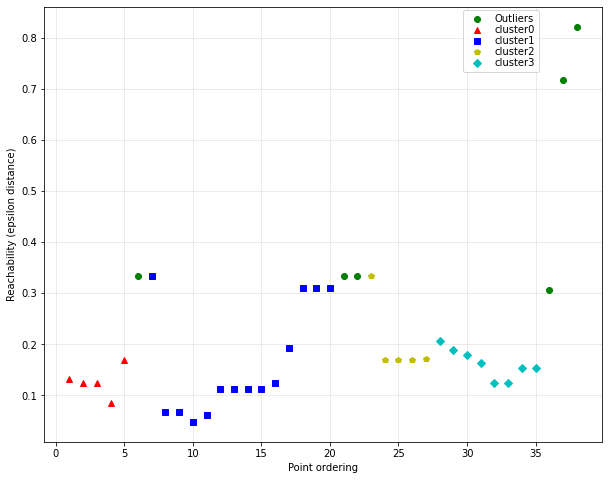

In [14]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import OPTICS
from scipy import stats
import seaborn as sns
import itertools
import statistics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
from collections import Counter
from scipy.stats import pearsonr
def basic_cluster_visualization(clustering, training_count, cluster_labels):
  space = np.arange(training_count)
  labels = clustering.labels_[clustering.ordering_]
  reachability = clustering.reachability_[clustering.ordering_]

  plt.figure(figsize=(10, 8))
  colors = ['og', '^r', 'sb', 'py', 'Dc', '<k', '>m', '*y', '|r']

  for cluster, color in zip(range(-1, 8), colors):
      x = space[labels == cluster]
      y = reachability[labels == cluster]
      plt.plot(x, y, color)
      
  plt.grid(alpha=0.3)
  plt.legend(cluster_labels, loc=(0.75, 0.85), labelspacing=0.1)
  plt.ylabel('Reachability (epsilon distance)')
  plt.xlabel('Point ordering')
  figure = plt.gcf()
  plt.show()
labels = ['Outliers'] + cluster_names
basic_cluster_visualization(clustering_results, len(prepared_list), labels)

## Boxplots

We use boxplots to visualize the range of attribute values for indivual clusters

Boxplots also show median and outliers for each cluster

In [15]:
cluster_labels = cluster_names

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

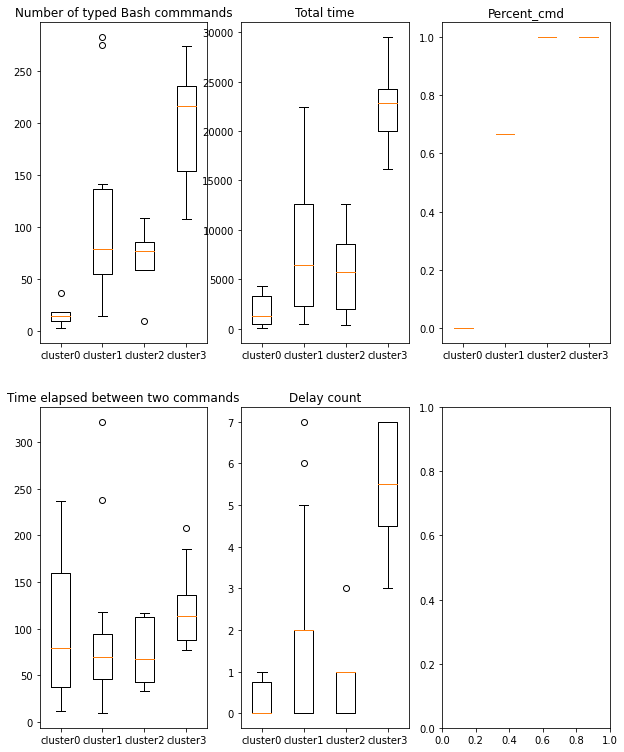

In [16]:
cu.draw_boxplots(attribute_data, cluster_labels)

## Radar chart

Radar chart showing median attribute values for each cluster

Values are scaled by their maximum for better visualization

In [17]:
attribute_names = ['total_cmd', 'total_time', 'average_diff',
                   'delay_count', 'percent_cmd']

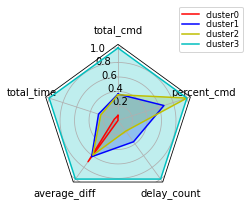

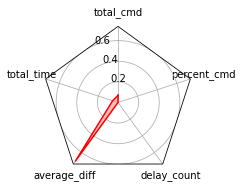

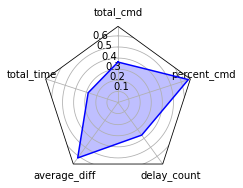

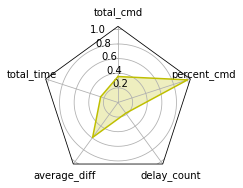

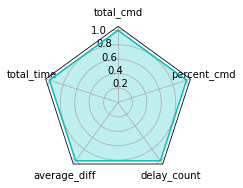

In [18]:
cu.draw_radar_chart(attribute_names, attribute_data, cluster_labels)

## Scatterplot

The scatterplot shows the relationship between number of typed Bash commands and average delay

In [19]:
xlabel = 'Total bash commands'
ylabel = 'Average delay between two commands'

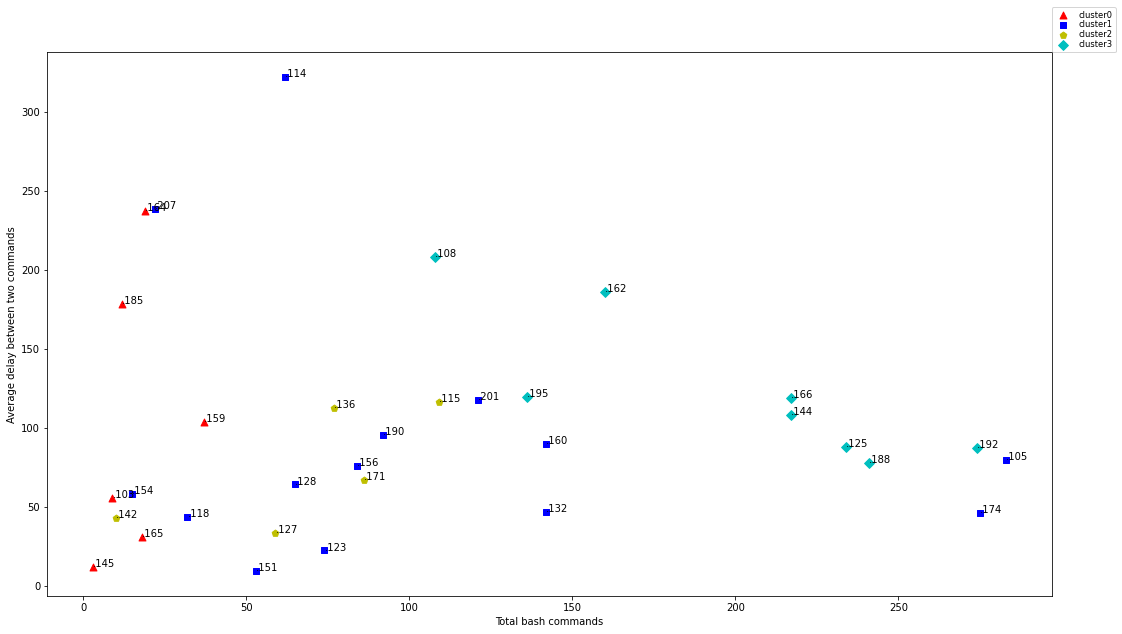

In [20]:
cu.scatter_plot(attribute_data, 0 ,2, xlabel, ylabel, cluster_labels, dictClusterDPs)

In [21]:
xlabel = 'Total bash commands'
ylabel = 'Total time'

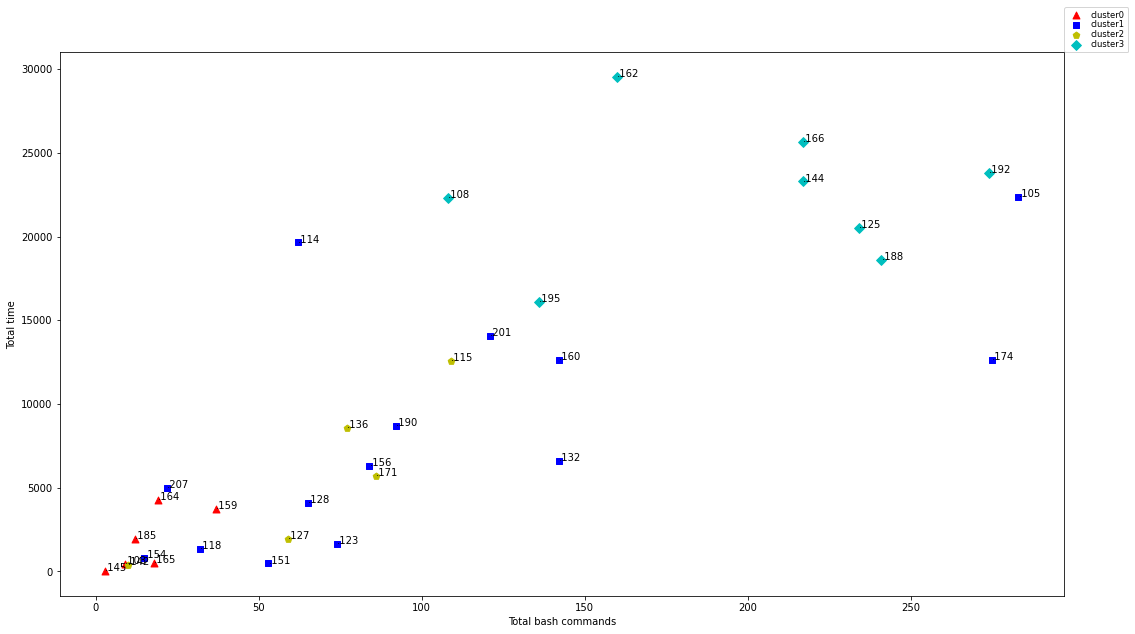

In [22]:
cu.scatter_plot(attribute_data, 0 ,1, xlabel, ylabel, cluster_labels, dictClusterDPs)

In [23]:
xlabel = 'Total bash commands'
ylabel = 'Percent commands'

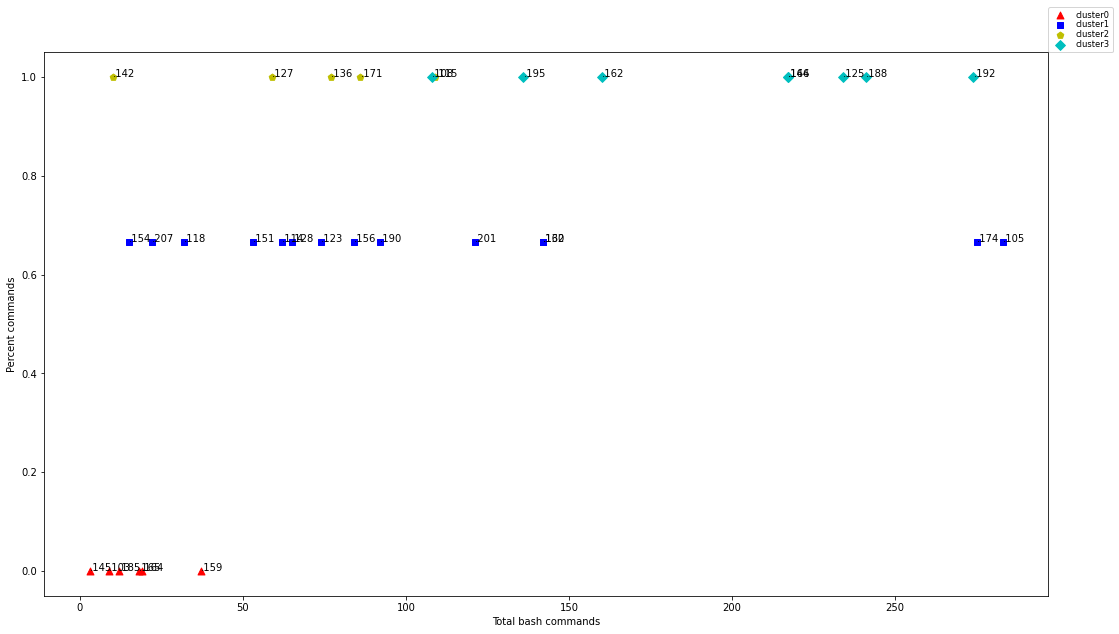

In [24]:
cu.scatter_plot(attribute_data, 0 ,4, xlabel, ylabel, cluster_labels, dictClusterDPs)

In [25]:
xlabel = 'Total time'
ylabel = 'Average_diff'

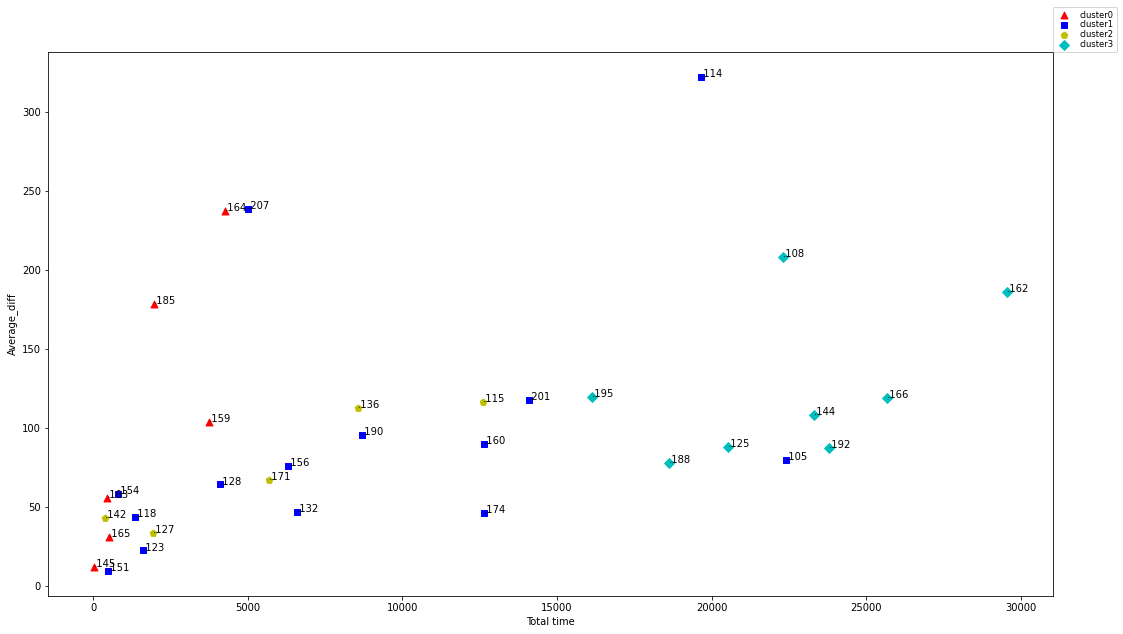

In [26]:
cu.scatter_plot(attribute_data, 1, 2, xlabel, ylabel, cluster_labels, dictClusterDPs)

## Heatmaps

Heatmap that shows correlation between individual features

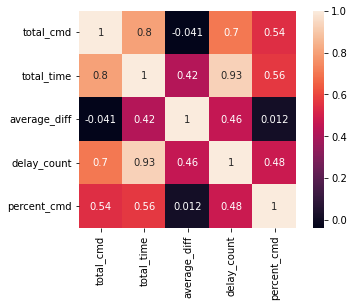

In [27]:
cu.draw_cor_heatmap(attribute_names, attribute_data)